In [274]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import inspect
import warnings
import matplotlib.pyplot as plt
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Data understanding



## Importing Libraries

##  Importing Dataset

In [275]:
Influencer_dataset = pd.read_excel("finalInfluencerDataset.xlsx")

# 1.1. Data Overview

In [276]:
Influencer_dataset.head()

,Nom,IG_Handle,Followers,Topics,Lien Instagram,country
0,NaN,NaN,NaN,NaN,NaN,morocco
1,KAWTAR BA-MOHAMED كوثر بامو,@kawtarbamo,9M,Beauty,https://www.instagram.com/kawtarbamo,morocco
2,Meryem Asouab,@meryemasouab,6.7M,Beauty,https://www.instagram.com/meryemasouab,morocco
3,Bassma Boussil,@bassmaboussel,5.9M,Beauty,https://www.instagram.com/bassmaboussel,morocco
4,Ihssane Benalluch احسان بنعلوش 🇲🇦,@ihssanebenalluch,4.4M,Beauty,https://www.instagram.com/ihssanebenalluch,morocco


In [277]:
def overView(df):
    '''
    Overview of the dataset
    
    df_name :     Dataframe name
    '''
    # get the name of the dataset
    frame = inspect.currentframe().f_back
    df_name = [name for name, val in frame.f_locals.items() if val is df][0]
    print(f"{df_name}")
    print(f"\nShape: {df.shape}")
    print(f"\nFeatures:")
    print(f"\n{df.columns.tolist()}")
    print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")
    print(f"\nMissing values: {df.isna().sum().sum()}")
    print(f"\nUnique values:")
    print(f"\n{df.nunique()}")

In [278]:
overView(Influencer_dataset)

Influencer_dataset

Shape: (3167, 6)

Features:

['Nom', 'IG_Handle', 'Followers', 'Topics', 'Lien Instagram', 'country']

Number of duplicated rows: 209

Missing values: 111

Unique values:

Nom               2751
IG_Handle         2774
Followers         1870
Topics               6
Lien Instagram    2775
country             14
dtype: int64


In [279]:
Influencer_dataset.describe()

,Nom,IG_Handle,Followers,Topics,Lien Instagram,country
count,3120,3151,3151,3151,3151,3167
unique,2751,2774,1870,6,2775,14
top,Afrah chiadli,@,1M,Fashion,https://www.instagram.com//,morocco
freq,3,4,71,1285,4,320


# 1.2. Data Exploration

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def influencerTopicDistribution(df):
    """
    Visualize the distribution of topics in the DataFrame, filtering out topics 
    with less than 10 occurrences, and displaying a pie chart.

    Parameters:
    df : DataFrame
        The DataFrame containing influencer data with a column 'Topics'.
    """
    column_name = 'Topics'  # Ensure the correct column name
    
    # Clean topic names (remove leading/trailing spaces)
    df[column_name] = df[column_name].str.strip()
    
    # Get topic counts and filter out topics with less than 10 occurrences
    topic_counts = df[column_name].value_counts()
    topic_counts = topic_counts[topic_counts >= 10]

    if topic_counts.empty:
        print("No topics meet the minimum count threshold.")
        return

    # Define colors and explode effect
    colors = sns.color_palette('pastel', len(topic_counts))
    explode = [0.05] * len(topic_counts)  # Slight explosion effect

    # Create pie chart
    plt.figure(figsize=(10, 10))  # Increase figure size
    wedges, texts, autotexts = plt.pie(
        topic_counts,
        labels=topic_counts.index,
        autopct=lambda p: f'{p:.1f}%' if p > 1 else f'<1%',  # Show small values as <1% instead of hiding
        startangle=140,  
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12}  # Improve readability
    )

    # Adjust label positions for better readability
    for text in texts:
        text.set_fontsize(12)

    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('black')
        autotext.set_weight('bold')

    # Add a legend outside the pie chart
    plt.legend(topic_counts.index, title="Topics", loc="upper left", bbox_to_anchor=(1, 1))

    # Title
    plt.title('Influencer Topic Distribution', fontsize=16, fontweight='bold')

    # Suppress warnings
    warnings.filterwarnings("ignore", category=UserWarning)

    plt.show()


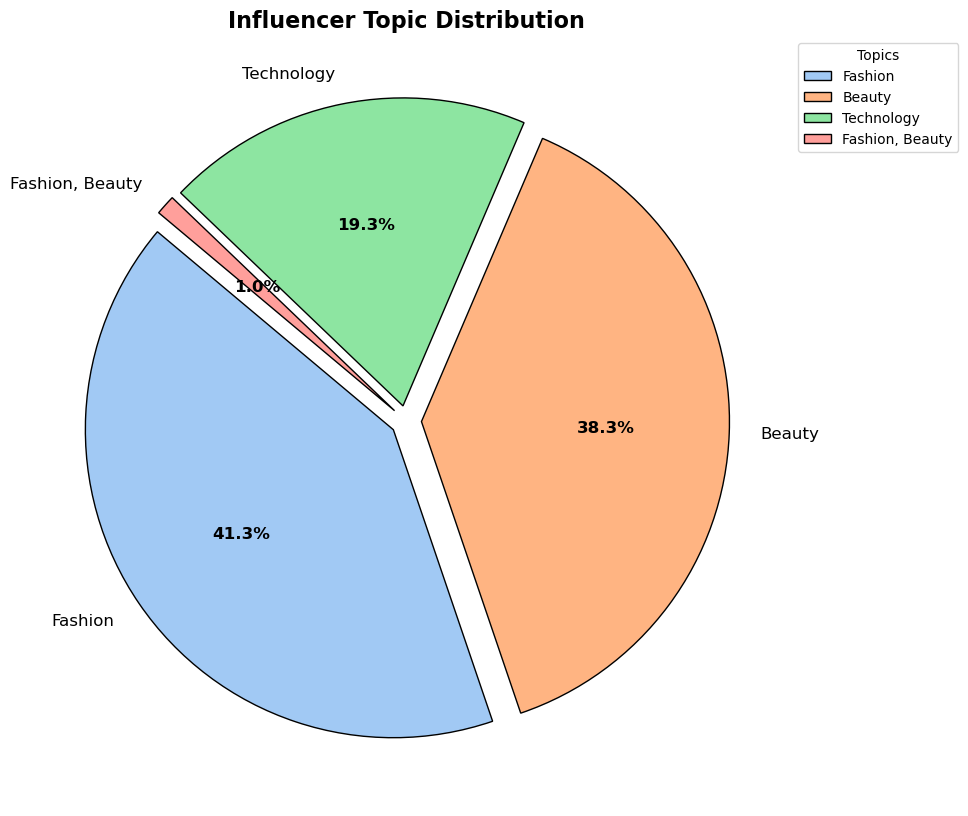

In [281]:
influencerTopicDistribution(Influencer_dataset)

 This function handles the conversion of the 'Nbr_Followers' column values to numeric values. It does this by replacing 'K' with *1e3 and 'M' with *1e6, then evaluating the expressions to convert them to numeric values.

 Function to plot the distribution of the number of followers****

In [282]:
def plot_followers_distribution(df):
    """
    Plot the distribution of the number of followers.
    """
    # Suppress the FutureWarning
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Replace infinite values with NaN
    df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

    # Plot the distribution
    plt.figure(figsize=(10,6))
    sns.histplot(df['Followers'], kde=True, bins=30)
    plt.title('Distribution of Number of Followers')
    plt.xlabel('Number of Followers')
    plt.ylabel('Frequency')
    plt.show()

In [283]:
#plot_followers_distribution(Influencer_dataset)

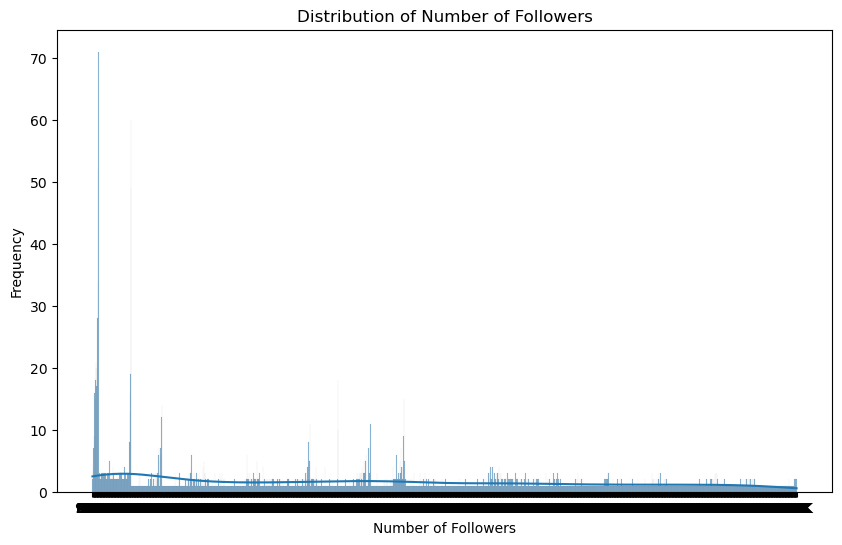

In [284]:
plot_followers_distribution(Influencer_dataset)

# Checking outliers:

In [285]:
def check_outliers(df):
    '''
    Plots box plots to check for outliers in numerical columns of a DataFrame.
    
    Parameters:
    df : DataFrame
        The DataFrame to check for outliers.
    '''
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    # Check if there are any numerical columns
    if len(numerical_columns) == 0:
        print("No numerical columns found in the DataFrame.")
        return
    
    # Calculate the number of rows and columns for subplots
    num_plots = len(numerical_columns)
    num_rows = (num_plots // 4) + (1 if num_plots % 4 else 0)
    
    # Create a figure with subplots
    plt.figure(figsize=(16, num_rows * 4))
    
    # Plot box plots for each numerical column
    for i, column in enumerate(numerical_columns):
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Assuming Influencer_dataset is your DataFrame
# check_outliers(Influencer_dataset)

In [286]:
check_outliers(Influencer_dataset)

No numerical columns found in the DataFrame.


In [287]:
print(Influencer_dataset.dtypes)

Nom               object
IG_Handle         object
Followers         object
Topics            object
Lien Instagram    object
country           object
dtype: object


In [288]:
# Replace`@` 
#Influencer_dataset.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Cellules vides
#Influencer_dataset["IG_Alt"] = Influencer_dataset["IG_Alt"].replace(r'^\s*@\s*$', np.nan, regex=True) 

In [289]:
def check_missing_and_duplicates(df):
    """
    Check for missing values and duplicates in a DataFrame, and visualize missing values.

    Parameters:
    df : DataFrame
        The DataFrame to check for missing values and duplicates.
    """
    # Check for missing values
    print("\n Valeurs manquantes par colonne :\n", df.isnull().sum())
    
    # Check for duplicates
    print("\n Nombre de doublons :", df.duplicated().sum())
    
    #  Visualize missing values
    plt.figure(figsize=(10, 5))
    plt.plot(df.isnull().sum(), marker='o', linestyle='-', color='r')
    plt.xticks(rotation=45)
    plt.xlabel("Colonnes")
    plt.ylabel("Nombre de valeurs manquantes")
    plt.title("Nombre de valeurs manquantes par colonne")
    plt.grid(True)
    plt.show()



 Valeurs manquantes par colonne :
 Nom               47
IG_Handle         16
Followers         16
Topics            16
Lien Instagram    16
country            0
dtype: int64

 Nombre de doublons : 209


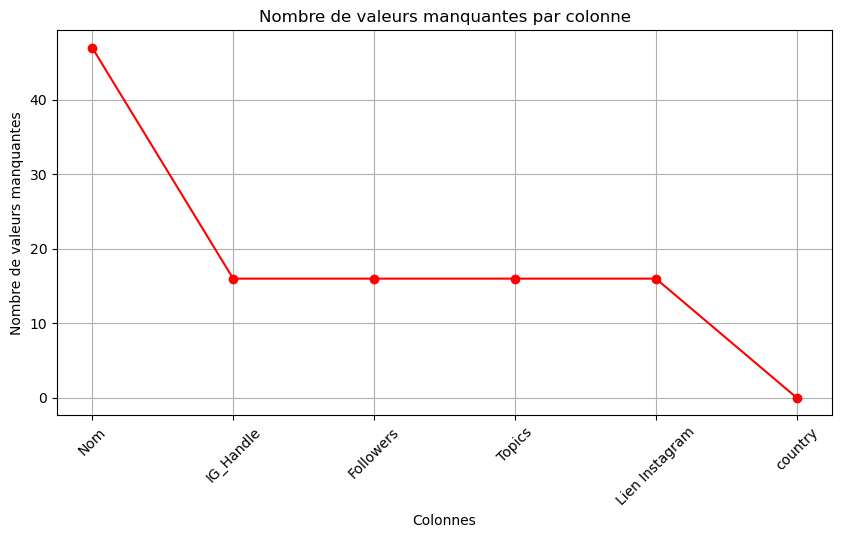

In [290]:
check_missing_and_duplicates(Influencer_dataset)

# Data preparation

In [291]:
import numpy as np
import pandas as pd

def clean_data(df):
    """
    Clean the DataFrame by performing the following steps:
    1. Rename columns.
    2. Replace empty values and standalone '@' with NaN.
    3. Drop rows with missing values.
    4. Drop duplicate rows.
    5. Clean and convert the 'Nbr_Followers' column to numeric.
    6. Normalize the 'Topic' column.
    7. Filter rows based on valid Instagram links.
    8. Remove rows based on follower conditions (>=900k or 'M'/'m') and add 'k' if necessary.
    
    Parameters:
    df : DataFrame
        The DataFrame to clean.

    Returns:
    DataFrame
        The cleaned DataFrame.
    """
    # Rename columns
    df.columns = ['Nom', 'IG_Handle', 'Followers', 'Topics', 'Lien Instagram', 'country']

    # Replace empty values and standalone '@' with NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Empty cells
    df["IG_Handle"] = df["IG_Handle"].replace(r'^\s*@\s*$', np.nan, regex=True)  # Standalone '@'

    # Drop rows with missing values in any column
    df.dropna(inplace=True)

    # Drop duplicate rows
    df.drop_duplicates(subset=['IG_Handle'], inplace=True)
     

    # Clean and convert 'Followers' to numeric (remove symbols and commas)
    df = df[~df["Followers"].str.contains("M|m", na=False, regex=True)]

# Supprimer les lignes où 'Followers' contient 'k' mais est inférieur à 900
    df = df[~df["Followers"].str.extract(r"(\d+)")[0].astype(float).gt(900)]

    # Normalize the 'Topic' column
    df["Topics"] = df["Topics"].str.strip().str.lower()

    # Filter rows based on valid Instagram links
    df = df[df["Lien Instagram"].str.startswith("https://www.instagram.com/")]

    # Afficher les résultats pour vérifier
    return df

In [292]:
#C:\Users\msi ghassen
#C:\Users\2169 yasmine

In [293]:
cleaned_df = clean_data(Influencer_dataset)

In [294]:
cleaned_df.to_excel("C:/Users/msi/Ghty.xlsx", index=False)


 Valeurs manquantes par colonne :
 Nom               0
IG_Handle         0
Followers         0
Topics            0
Lien Instagram    0
country           0
dtype: int64

 Nombre de doublons : 0


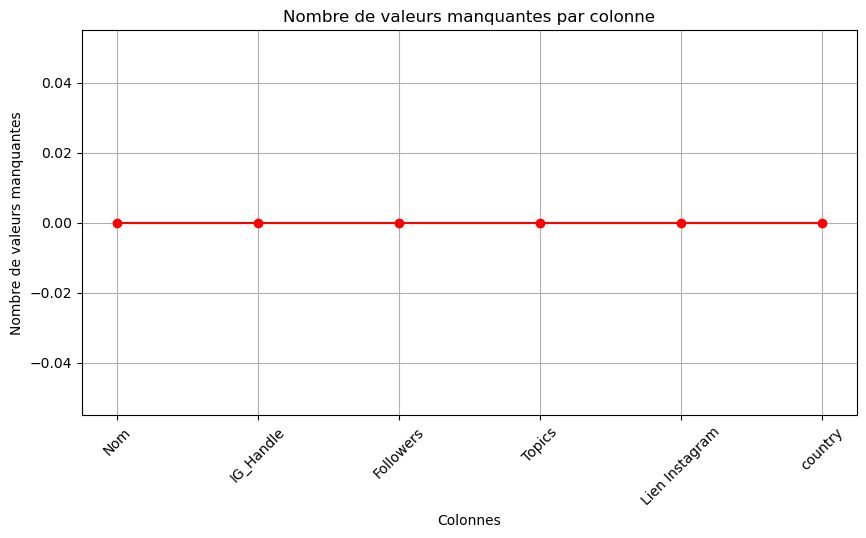

In [295]:
check_missing_and_duplicates(cleaned_df)

In [296]:
##import pandas as pd

##pd.set_option("display.max_rows", None)  # Afficher toutes les lignes
##pd.set_option("display.max_columns", None)  # Afficher toutes les colonnes

##print(cleaned_df)  # Affiche le DataFrame en entier

In [297]:
overView(cleaned_df)

cleaned_df

Shape: (2074, 6)

Features:

['Nom', 'IG_Handle', 'Followers', 'Topics', 'Lien Instagram', 'country']

Number of duplicated rows: 0

Missing values: 0

Unique values:

Nom               2074
IG_Handle         2074
Followers         1699
Topics               4
Lien Instagram    2074
country             14
dtype: int64


In [298]:


def check_unique_values(df):

    print(df['IG_Handle'].duplicated().sum())



In [299]:
check_unique_values(cleaned_df)



0


# visualisation

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_followers_distribution(df):
    """
    Plot a histogram of the number of followers.

    Parameters:
    df : DataFrame
        The DataFrame containing the 'Nbr_Followers' column.
    """
    # Create the plot
    plt.figure(figsize=(10, 5))
    sns.histplot(df["Followers"], bins=30, kde=True, color="blue")
    plt.xlabel("Nombre de Followers")
    plt.ylabel("Fréquence")
    plt.title("Distribution des Followers")
    plt.show()



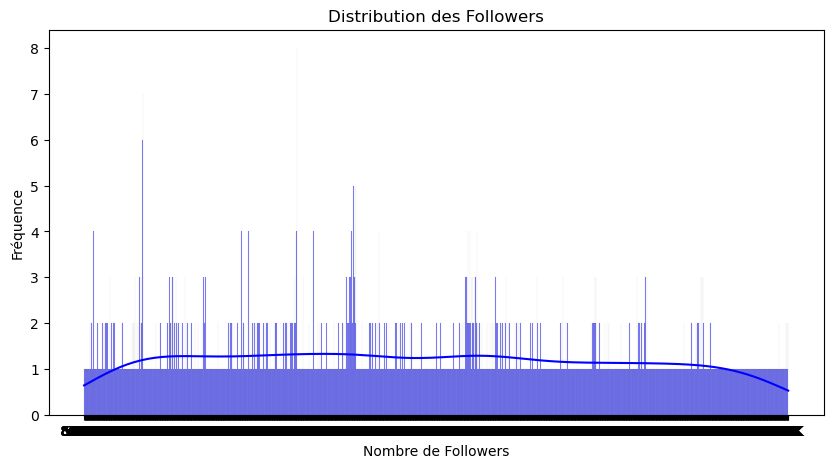

In [301]:
plot_followers_distribution(cleaned_df)

In [302]:
def plot_influencer_count_by_topic(df):
    """
    Visualizes the number of influencers in each topic using a bar plot.
    """
    df = df.dropna(subset=['Topics'])

    # Count influencers per topic
    topic_counts = df['Topics'].value_counts().reset_index()
    topic_counts.columns = ['Topics', 'Count']

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Topics', y='Count', data=topic_counts, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Number of Influencers by Topic')
    plt.xlabel('Topics')
    plt.ylabel('Count of Influencers')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


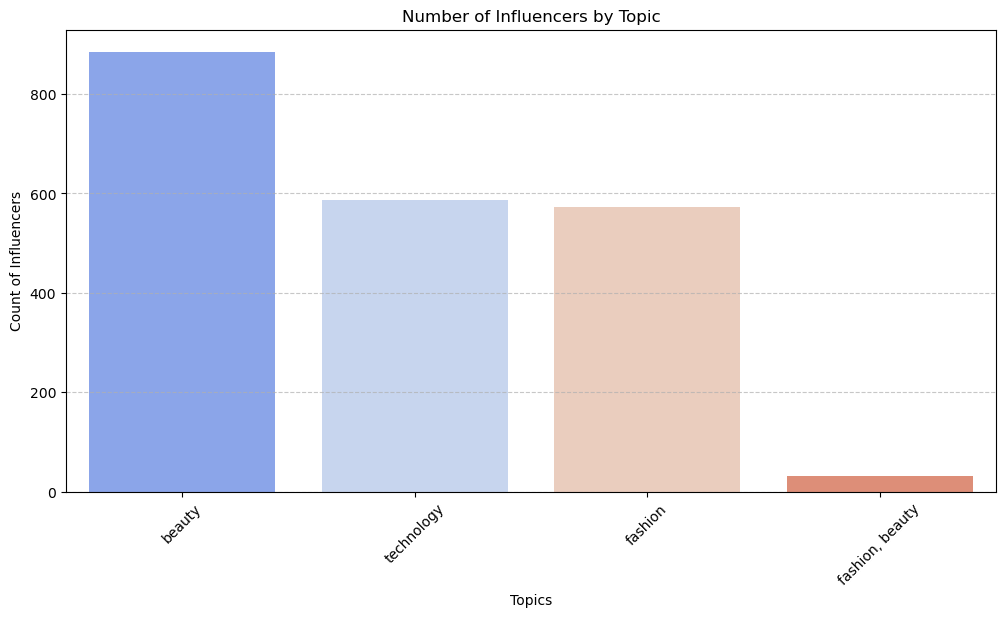

In [303]:
plot_influencer_count_by_topic(cleaned_df)

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_followers_by_topic(df):
    """
    Visualizes the average number of followers by topic using a bar plot.
    """
    # Remplacer les valeurs infinies par NaN et supprimer les lignes concernées
    df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
    df = df.dropna(subset=['Followers', 'Topics'])

    # Extraire uniquement la partie numérique avant 'k'
    df["Numeric_Followers"] = df["Followers"].str.extract(r"(\d+)")[0].astype(float)

    # Grouper par 'Topics' et calculer la moyenne des 'Followers'
    avg_followers = df.groupby('Topics', as_index=False)["Numeric_Followers"].mean()

    # Trier les sujets par nombre moyen d'abonnés pour une meilleure visualisation
    avg_followers = avg_followers.sort_values(by="Numeric_Followers", ascending=False)

    # Tracer le graphique
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Topics", y="Numeric_Followers", data=avg_followers, palette="viridis")
    plt.xticks(rotation=45)
    plt.title("Average Number of Followers by Topic")
    plt.xlabel("Topics")
    plt.ylabel("Average Followers (in k)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()


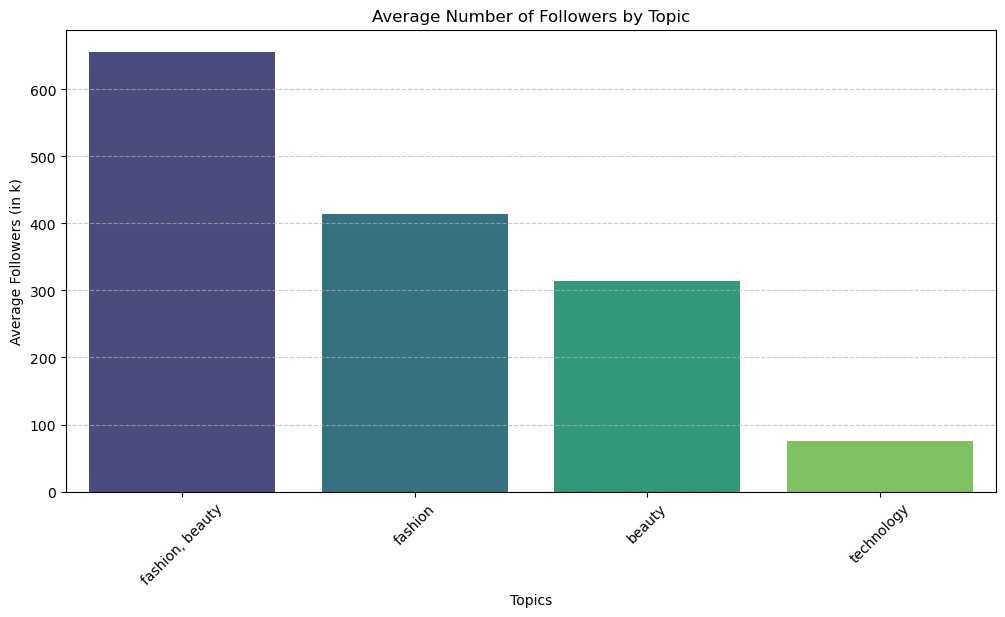

In [305]:
plot_avg_followers_by_topic(cleaned_df)

In [306]:
overView(cleaned_df)

cleaned_df

Shape: (2074, 6)

Features:

['Nom', 'IG_Handle', 'Followers', 'Topics', 'Lien Instagram', 'country']

Number of duplicated rows: 0

Missing values: 0

Unique values:

Nom               2074
IG_Handle         2074
Followers         1699
Topics               4
Lien Instagram    2074
country             14
dtype: int64


In [307]:
def plot_top_10_influencers_scatter(df):
    df_sorted = df.copy()

    df_sorted["Followers_Numeric"] = (
        df_sorted["Followers"]
        .astype(str)
        .str.replace('K', '', regex=False)
        .str.replace('k', '', regex=False)
        .astype(float)
    )

    df_sorted = df_sorted.sort_values(by="Followers_Numeric", ascending=False).head(10)

    # Affichage en Scatter Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sorted["Nom"], df_sorted["Followers_Numeric"], color="red", s=100)
    plt.xlabel("Influenceurs")
    plt.ylabel("Nombre de Followers")
    plt.title("Top 10 des Influenceurs (Graphique en points)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.show()

# plot_top_10_influencers_scatter(df)


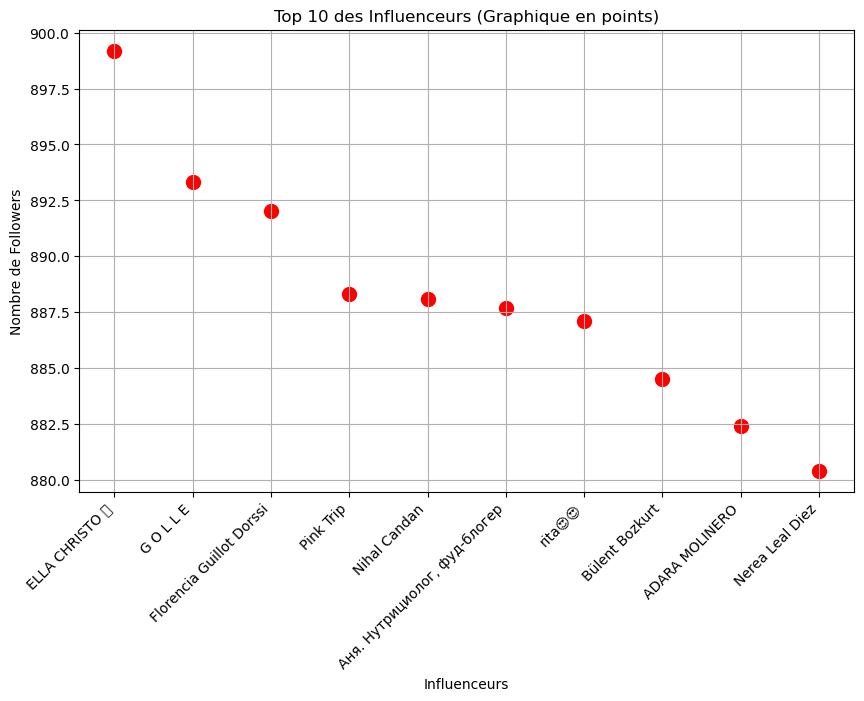

In [308]:
plot_top_10_influencers_scatter(cleaned_df)

In [309]:
def plot_top_10_influencers_pie(df):
    df_sorted = df.copy()

    df_sorted["Followers_Numeric"] = (
        df_sorted["Followers"]
        .astype(str)
        .str.replace('K', '', regex=False)
        .str.replace('k', '', regex=False)
        .astype(float)
    )

    df_sorted = df_sorted.sort_values(by="Followers_Numeric", ascending=False).head(10)

    # Affichage en camembert
    plt.figure(figsize=(8, 8))
    plt.pie(df_sorted["Followers_Numeric"], labels=df_sorted["Nom"], autopct="%1.1f%%", colors=plt.cm.Paired.colors)
    plt.title("Répartition des Followers pour le Top 10 des Influenceurs")
    plt.show()

# plot_top_10_influencers_pie(df)


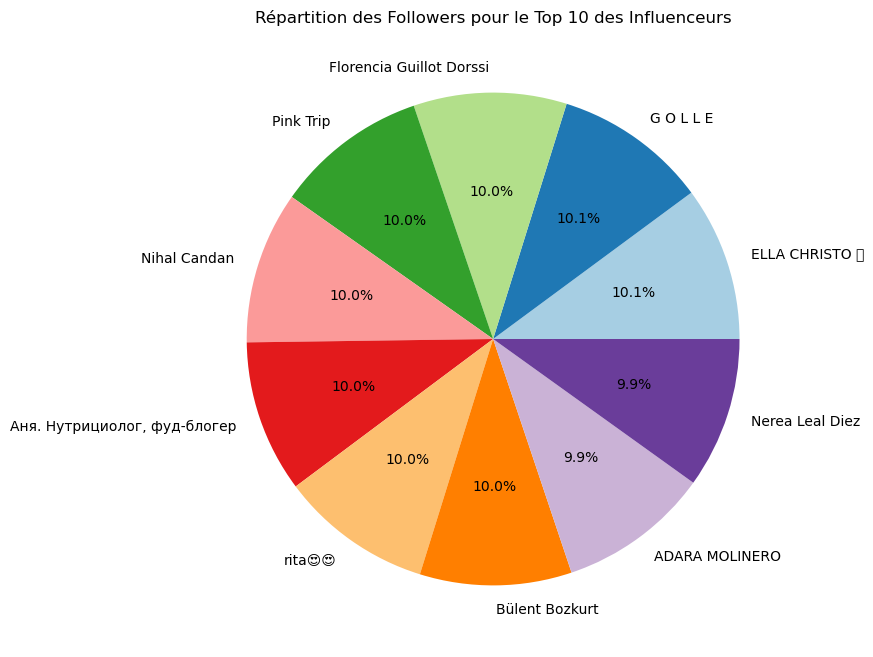

In [310]:
plot_top_10_influencers_pie(cleaned_df)

In [311]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_10_influencers_bar(df):
    df_sorted = df.copy()
    
    # Nettoyer et convertir 'Followers'
    df_sorted["Followers_Numeric"] = (
        df_sorted["Followers"]
        .astype(str)
        .str.replace('K', '', regex=False)
        .str.replace('k', '', regex=False)
        .astype(float)
    )

    # Trier et sélectionner les 10 meilleurs
    df_sorted = df_sorted.sort_values(by="Followers_Numeric", ascending=False).head(10)

    # Affichage en barres verticales
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted["Nom"], df_sorted["Followers_Numeric"], color="royalblue")
    plt.xlabel("Influenceurs")
    plt.ylabel("Nombre de Followers")
    plt.title("Top 10 des Influenceurs par Nombre de Followers")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Exemple d'utilisation :
# df = pd.read_csv("data.csv")
# plot_top_10_influencers_bar(df)


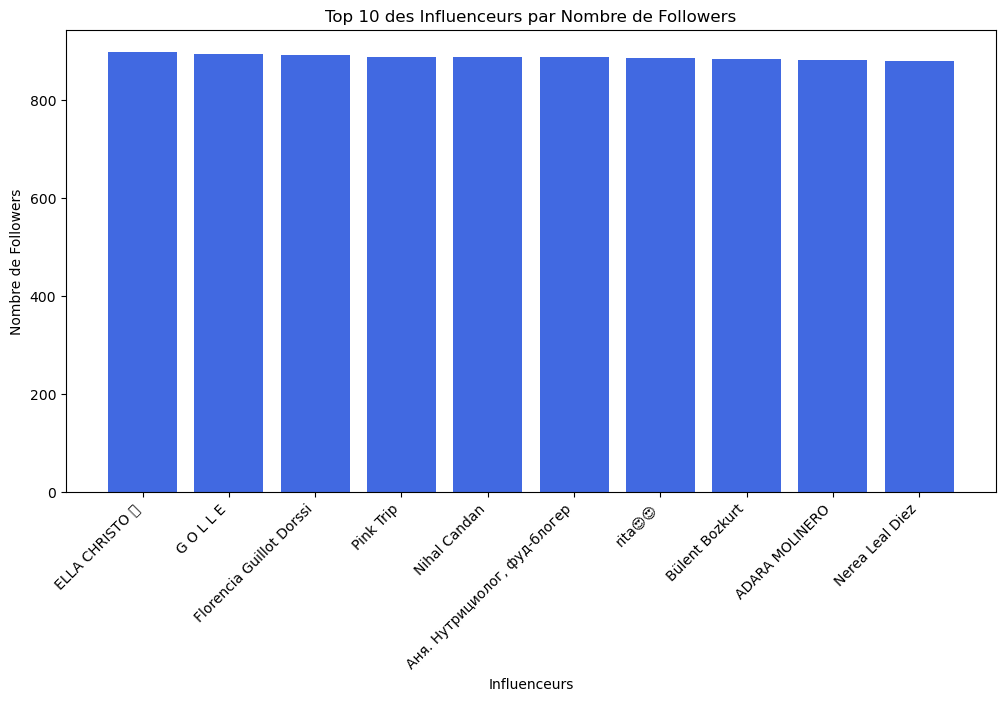

In [312]:
plot_top_10_influencers_bar(cleaned_df)

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

def count_influencers_by_country(df):
    # Compter le nombre d'influenceurs par pays
    country_counts = df["country"].value_counts()

    # Afficher les résultats sous forme de tableau
    print("Nombre d'influenceurs par pays :")
    print(country_counts)

    # Affichage en barres
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind="bar", color="coral")
    plt.xlabel("Pays")
    plt.ylabel("Nombre d'Influenceurs")
    plt.title("Nombre d'Influenceurs par Pays")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Exemple d'utilisation :
# df = pd.read_csv("data.csv")
# count_influencers_by_country(df)


Nombre d'influenceurs par pays :
country
Tunisia                 220
Spain                   199
Turkey                  184
switzerland             177
Belgium                 174
Italy                   173
Australia               169
Argentina               165
Algeria                 148
morocco                 143
Brazil                   93
France                   89
south-korea              76
united-arab-emirates     64
Name: count, dtype: int64


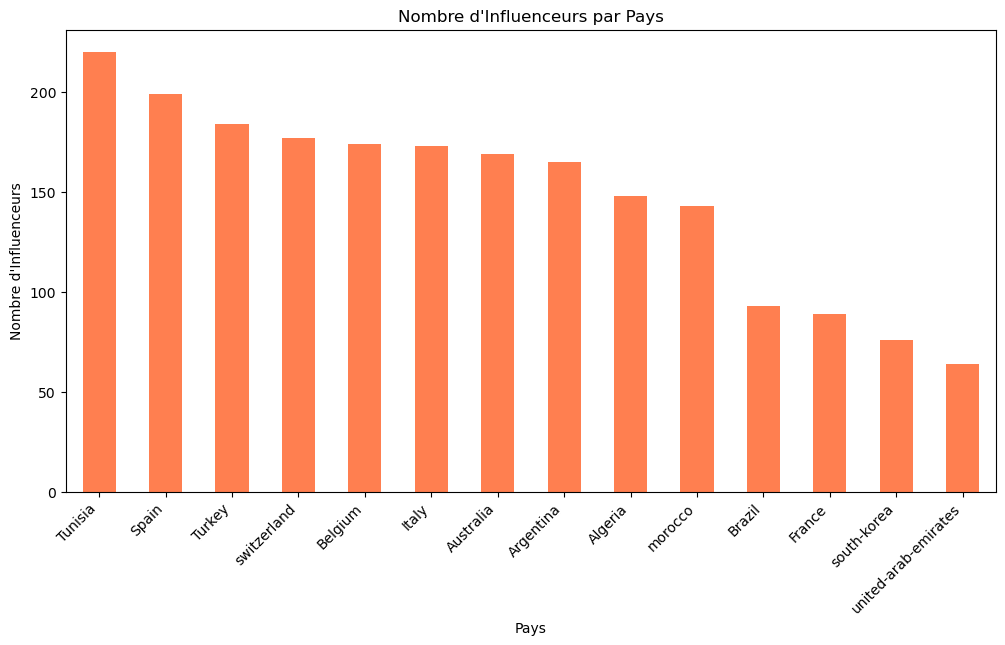

In [314]:
count_influencers_by_country(cleaned_df)

In [315]:
def plot_influencers_by_country_bar(df):
    country_counts = df["country"].value_counts()

    plt.figure(figsize=(12, 6))
    country_counts.plot(kind="bar", color="royalblue")
    plt.xlabel("Pays")
    plt.ylabel("Nombre d'Influenceurs")
    plt.title("Nombre d'Influenceurs par Pays")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# plot_influencers_by_country_bar(df)


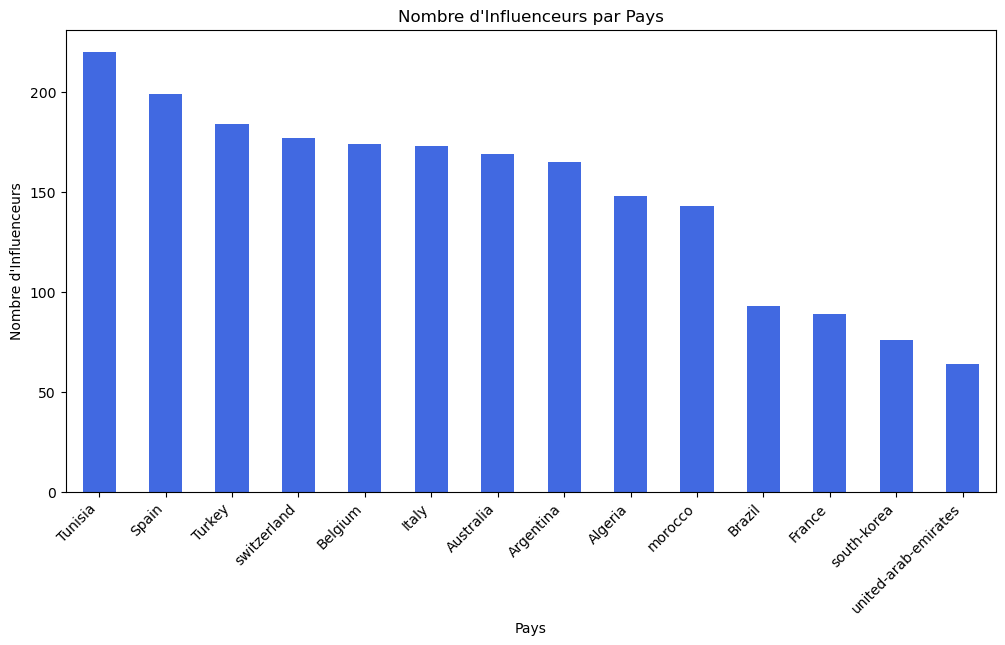

In [316]:
plot_influencers_by_country_bar(cleaned_df)

In [317]:
def plot_influencers_by_country_pie(df):
    country_counts = df["country"].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
    plt.title("Répartition des Influenceurs par Pays")
    plt.show()

# plot_influencers_by_country_pie(df)


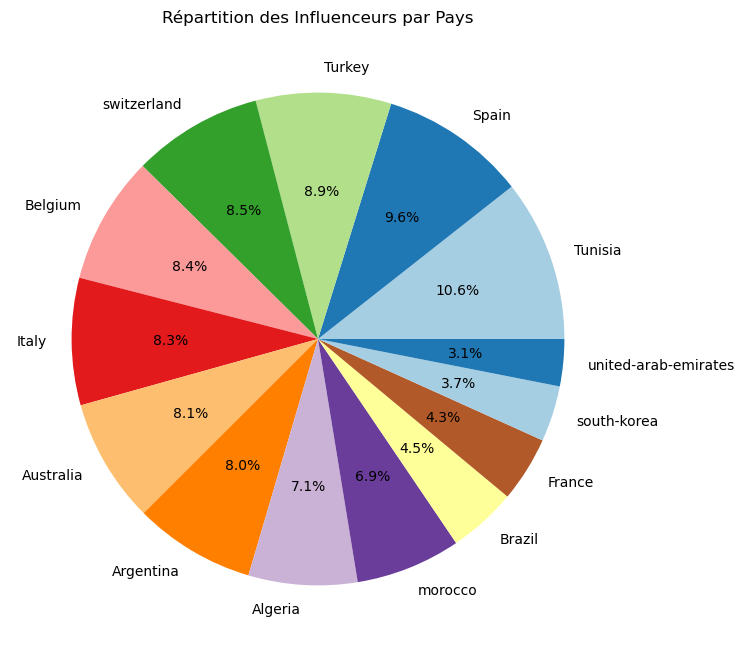

In [318]:
plot_influencers_by_country_pie(cleaned_df)

In [319]:
def plot_influencers_by_country_scatter(df):
    country_counts = df["country"].value_counts()

    plt.figure(figsize=(10, 6))
    plt.scatter(country_counts.index, country_counts.values, color="red", s=100)
    plt.xlabel("Pays")
    plt.ylabel("Nombre d'Influenceurs")
    plt.title("Nombre d'Influenceurs par Pays (Graphique en Points)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True)
    plt.show()

# plot_influencers_by_country_scatter(df)


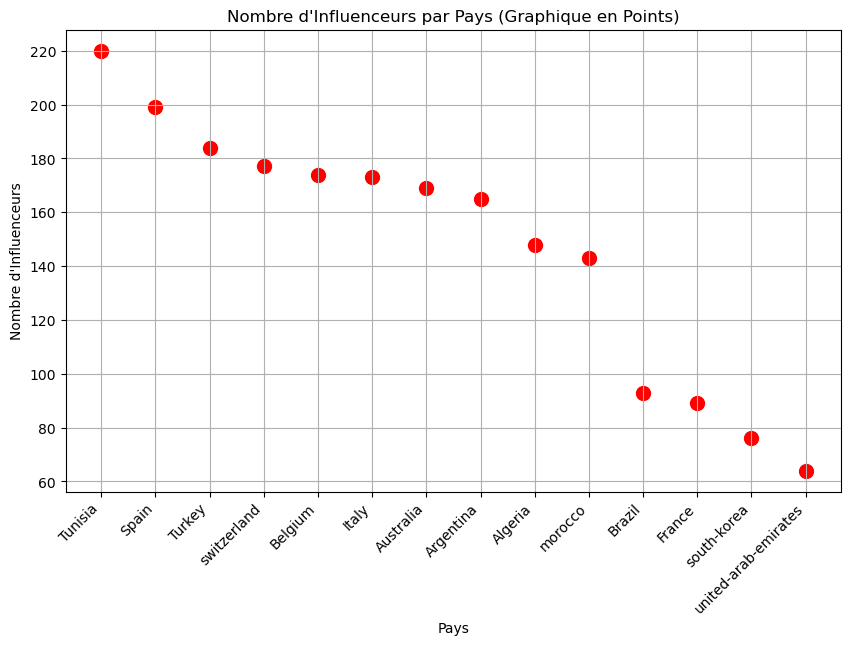

In [320]:
plot_influencers_by_country_scatter(cleaned_df)

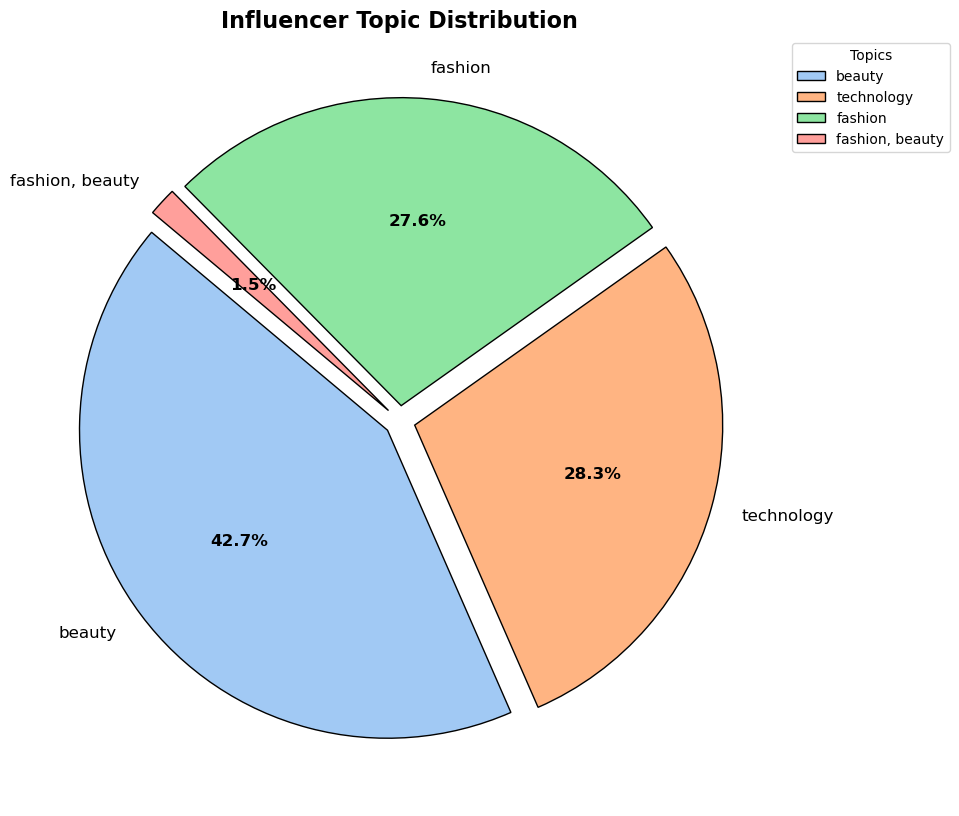

In [321]:
influencerTopicDistribution(cleaned_df)

In [350]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_10_influencers_by_country(df):
    df_sorted = df.copy()
    
    # Nettoyer et convertir 'Followers'
    df_sorted["Followers_Numeric"] = (
        df_sorted["Followers"]
        .astype(str)
        .str.replace('K', '', regex=False)
        .str.replace('k', '', regex=False)
        .astype(float)
    )

    # Group by country
    countries = df_sorted["country"].unique()
    
    for country in countries:
        df_country = df_sorted[df_sorted["country"] == country]
        
        # Trier et sélectionner les 10 meilleurs pour chaque pays
        df_country_sorted = df_country.sort_values(by="Followers_Numeric", ascending=False).head(10)
        
        # Affichage en scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(df_country_sorted["Nom"], df_country_sorted["Followers_Numeric"], color="red", s=100)
        plt.xlabel("Influenceurs")
        plt.ylabel("Nombre de Followers")
        plt.title(f"Top 10 des Influenceurs en {country} par Nombre de Followers")
        plt.xticks(rotation=45, ha="right")
        plt.grid(True)
        plt.show()

# Exemple d'utilisation :
# df = pd.read_csv("data.csv")
# plot_top_10_influencers_by_country(df)


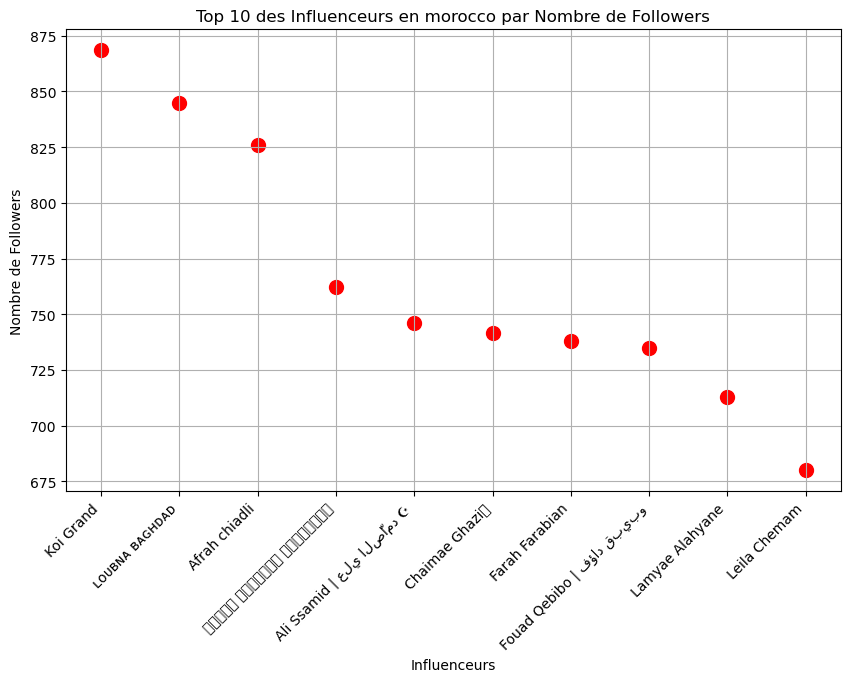

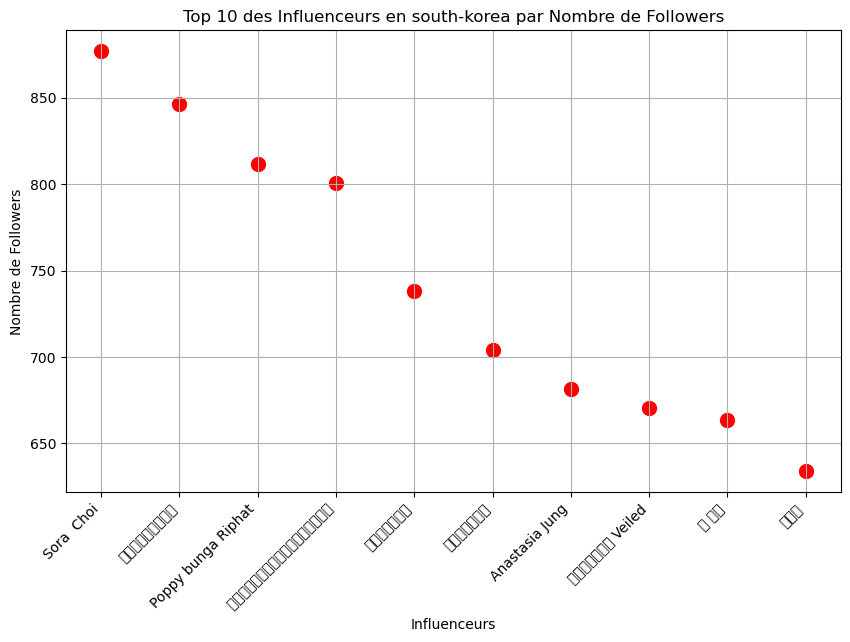

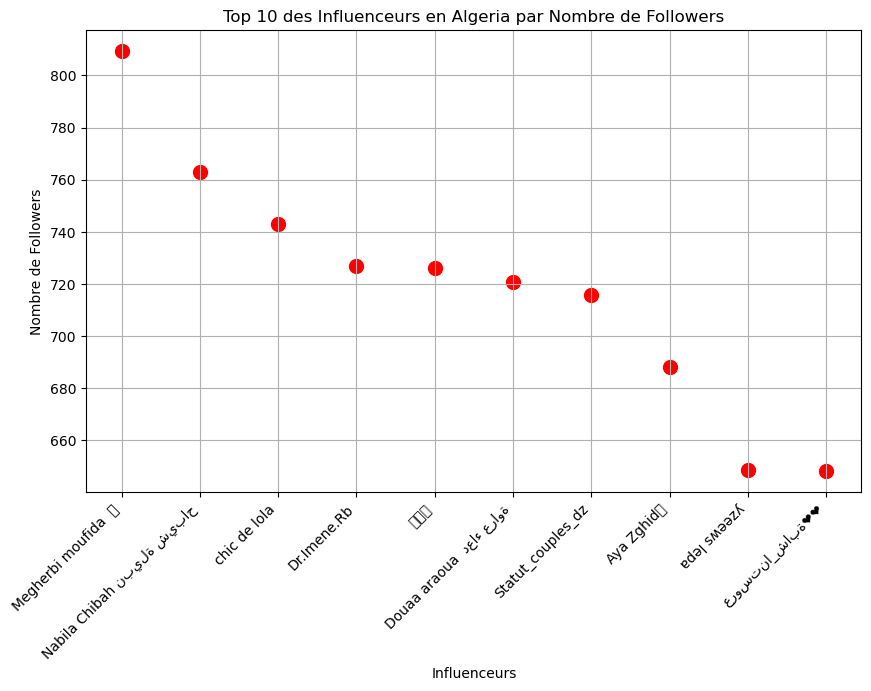

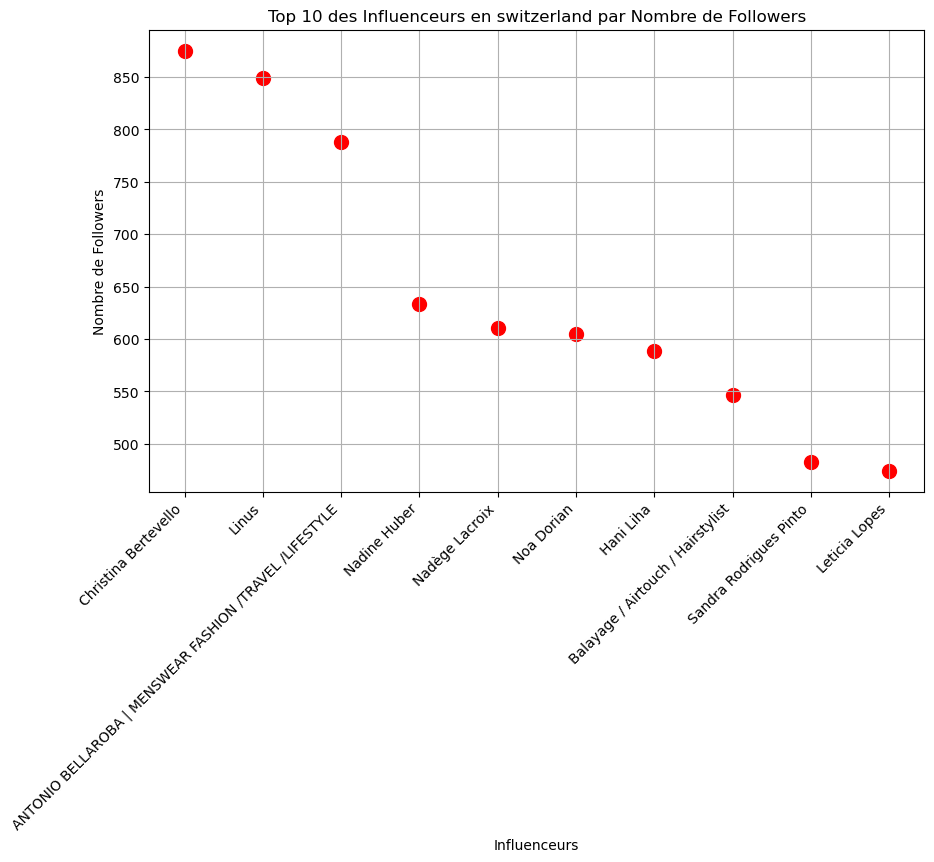

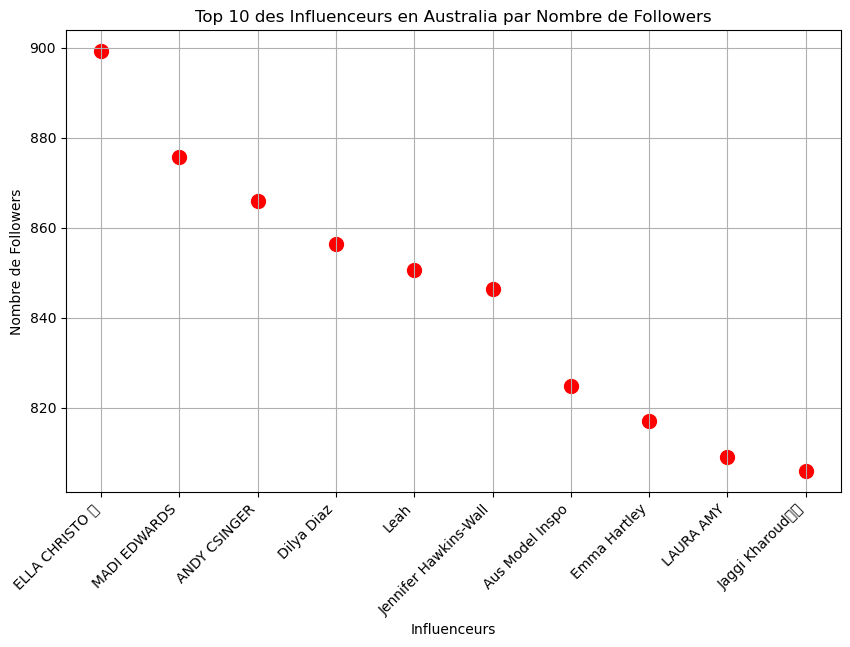

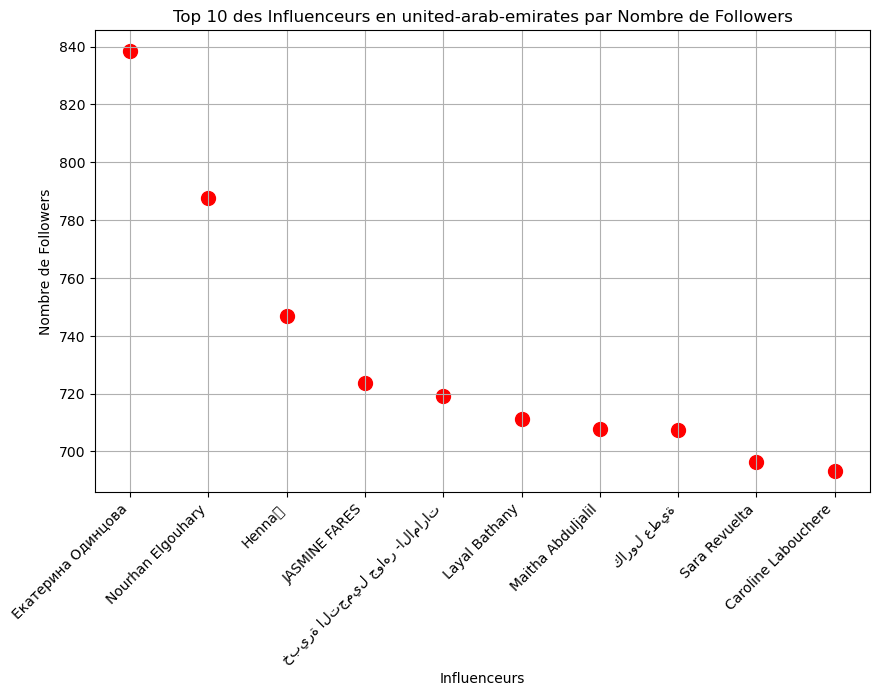

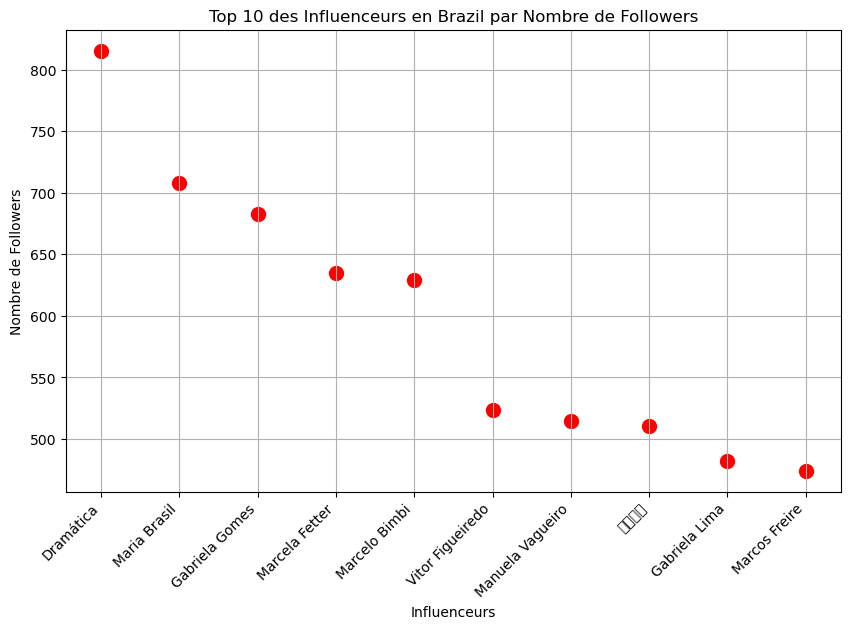

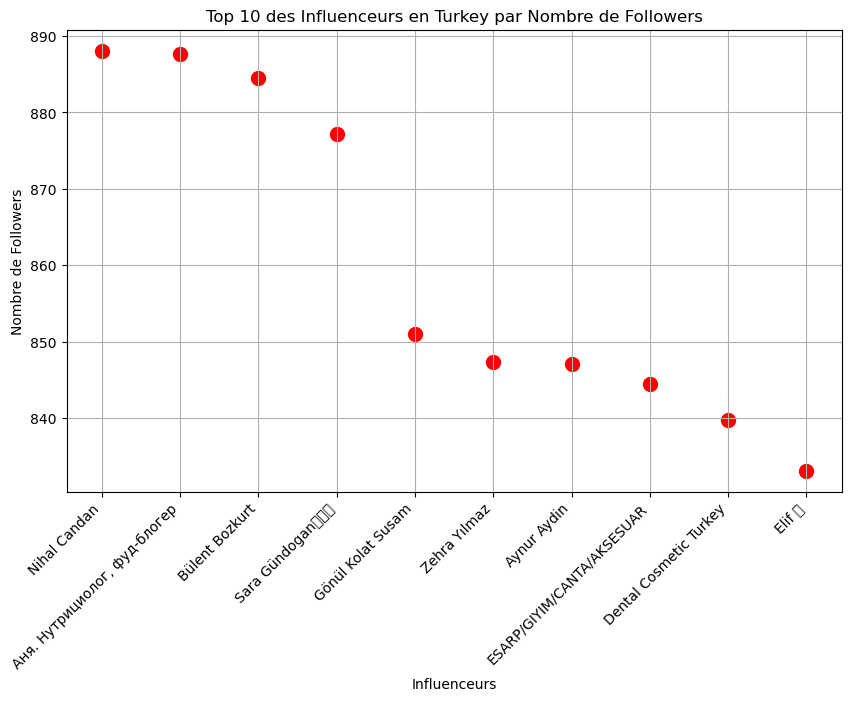

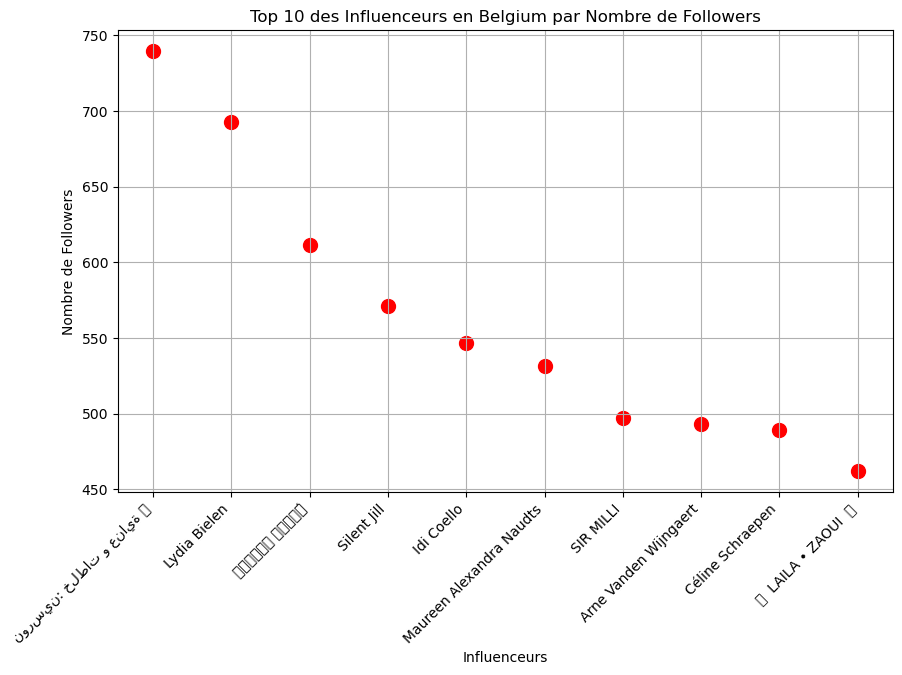

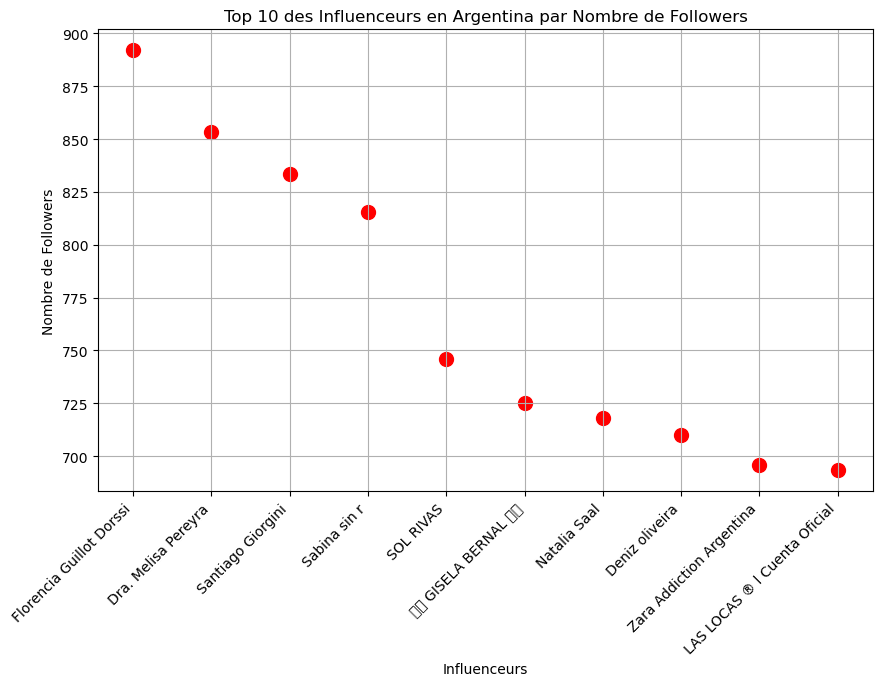

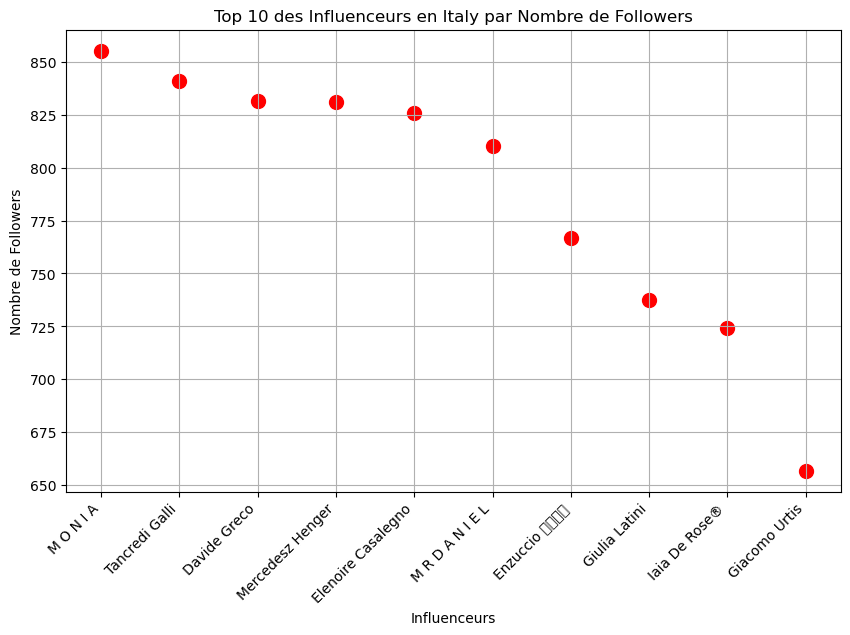

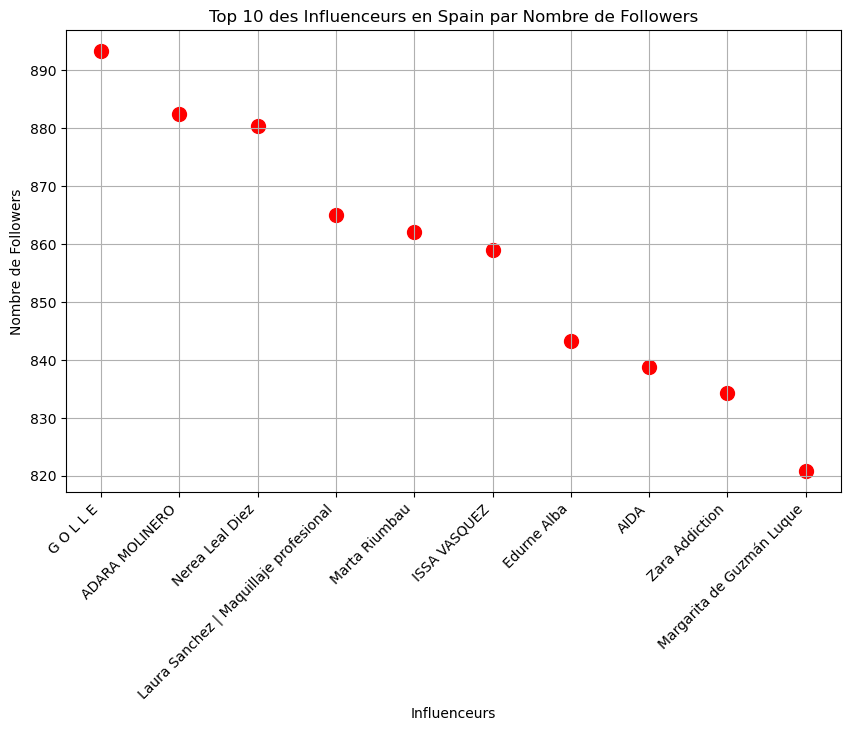

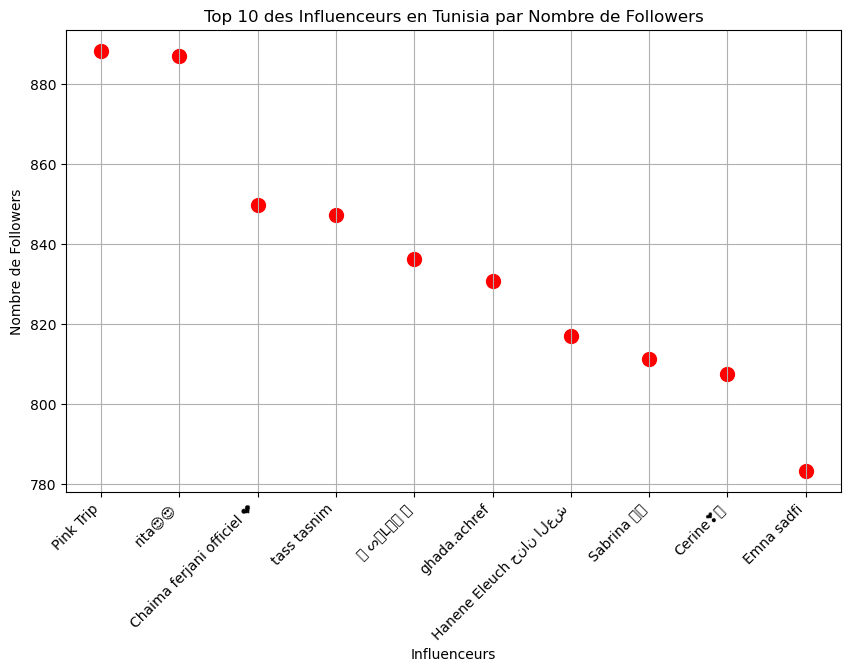

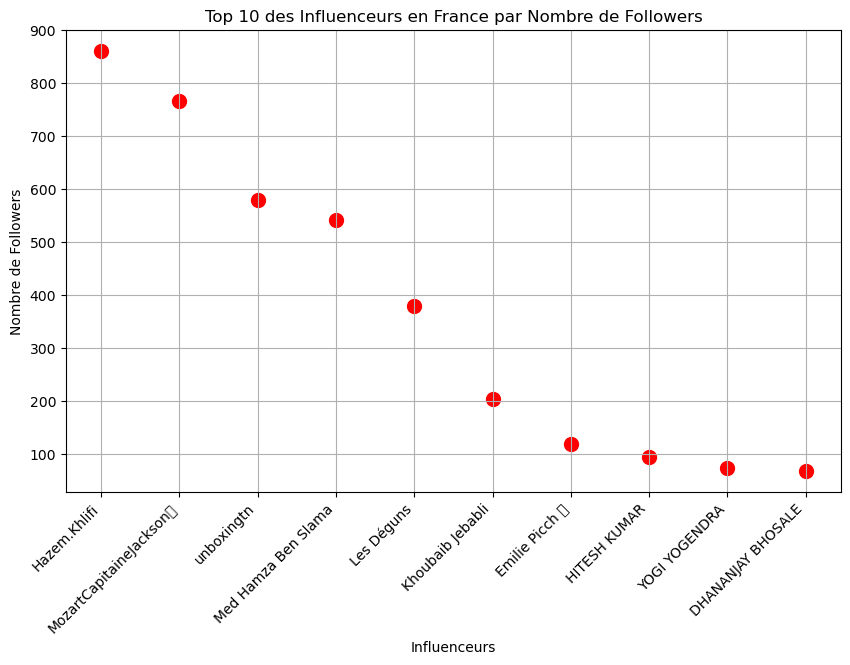

In [351]:
plot_top_10_influencers_by_country(cleaned_df)

In [352]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_followers_by_topic_and_country(df):
    """
    Visualizes the average number of followers by topic for each country using bar plots.
    """
    # Remplacer les valeurs infinies par NaN et supprimer les lignes concernées
    df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
    df = df.dropna(subset=['Followers', 'Topics', 'country'])

    # Extraire uniquement la partie numérique avant 'k'
    df["Numeric_Followers"] = df["Followers"].str.extract(r"(\d+)")[0].astype(float)

    # Grouper par 'country' et 'Topics' et calculer la moyenne des 'Followers'
    avg_followers_by_country_topic = df.groupby(['country', 'Topics'], as_index=False)["Numeric_Followers"].mean()

    # Trier les sujets par nombre moyen d'abonnés pour une meilleure visualisation
    avg_followers_by_country_topic = avg_followers_by_country_topic.sort_values(by="Numeric_Followers", ascending=False)

    # Créer un graphique pour chaque pays
    countries = df['country'].unique()
    for country in countries:
        country_data = avg_followers_by_country_topic[avg_followers_by_country_topic['country'] == country]
        
        # Tracer le graphique pour ce pays
        plt.figure(figsize=(12, 6))
        sns.barplot(x="Topics", y="Numeric_Followers", data=country_data, palette="viridis")
        plt.xticks(rotation=45)
        plt.title(f"Average Followers by Topic in {country}")
        plt.xlabel("Topics")
        plt.ylabel("Average Followers (in k)")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation :
# df = pd.read_csv("data.csv")
# plot_avg_followers_by_topic_and_country(df)




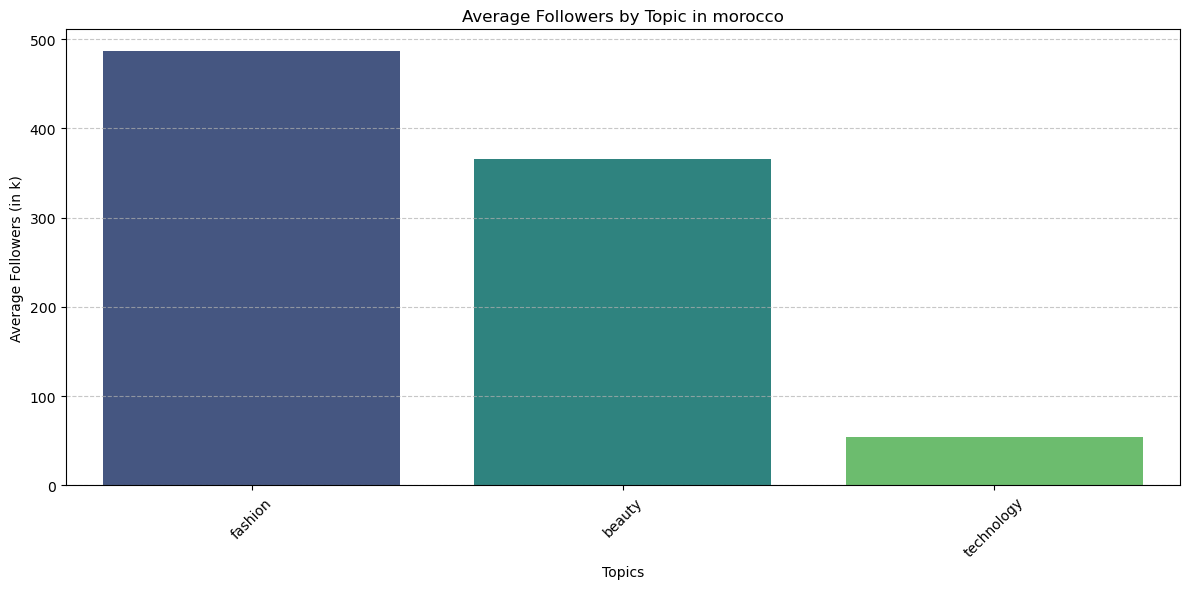

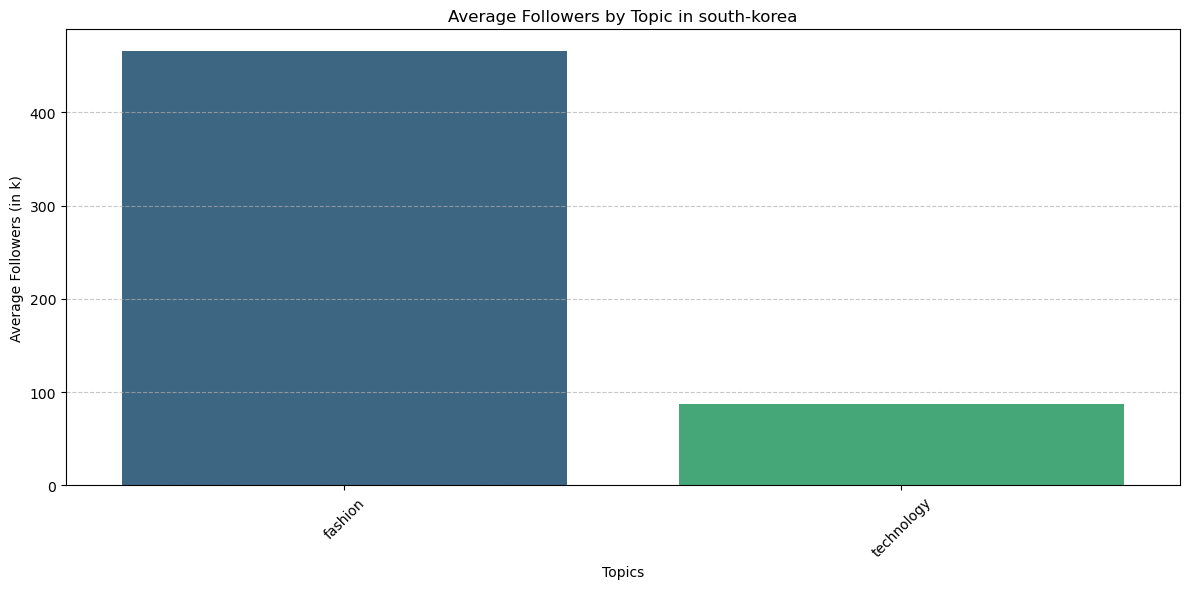

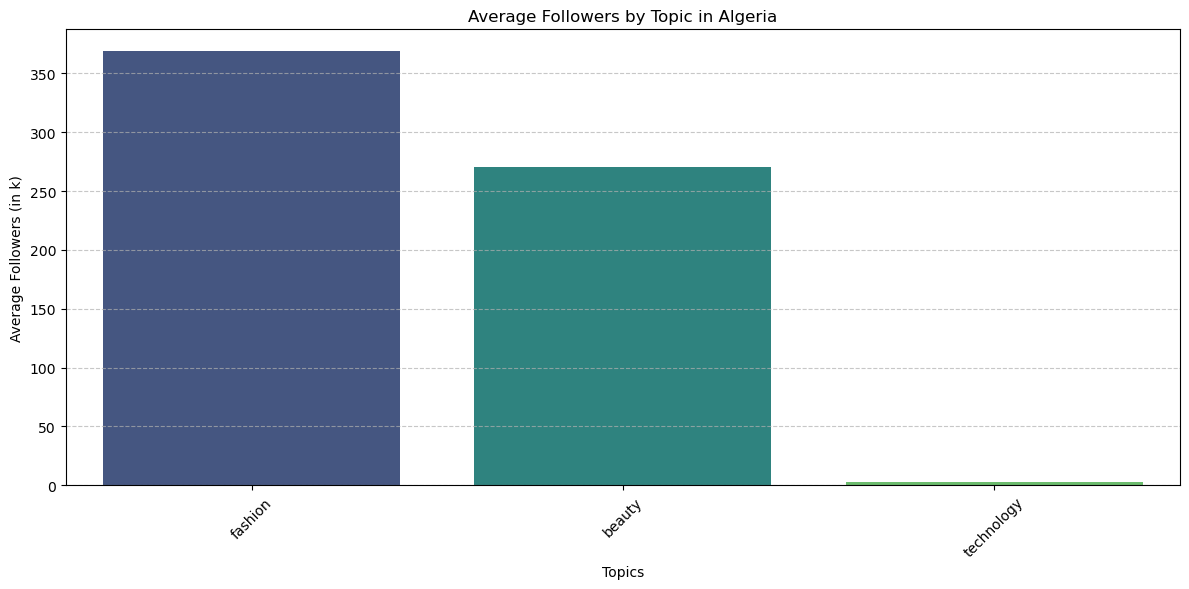

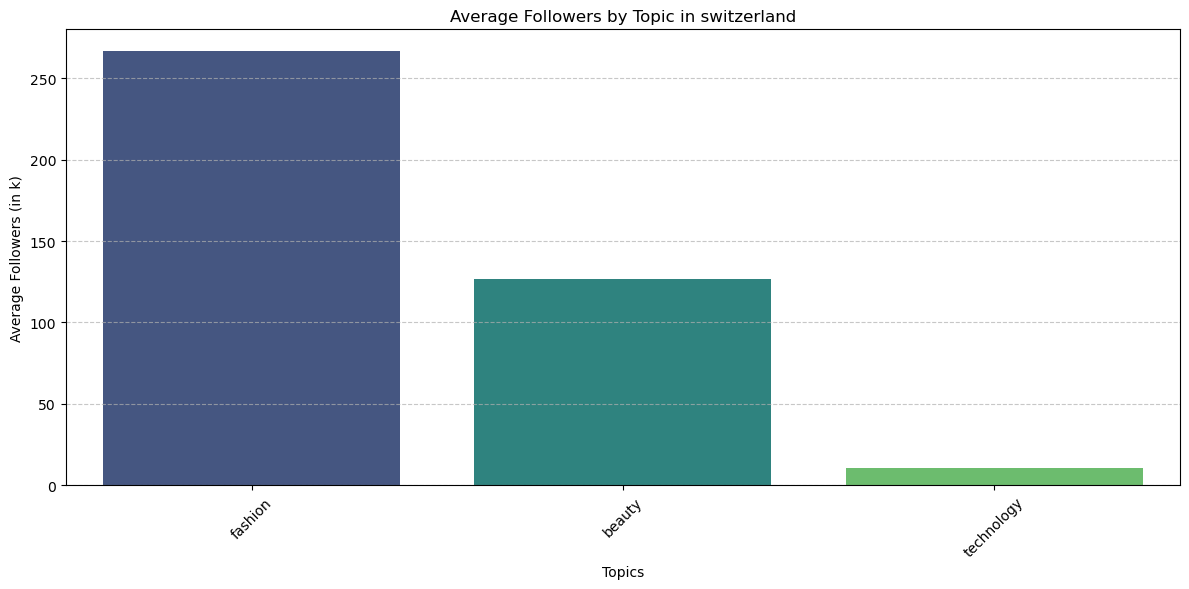

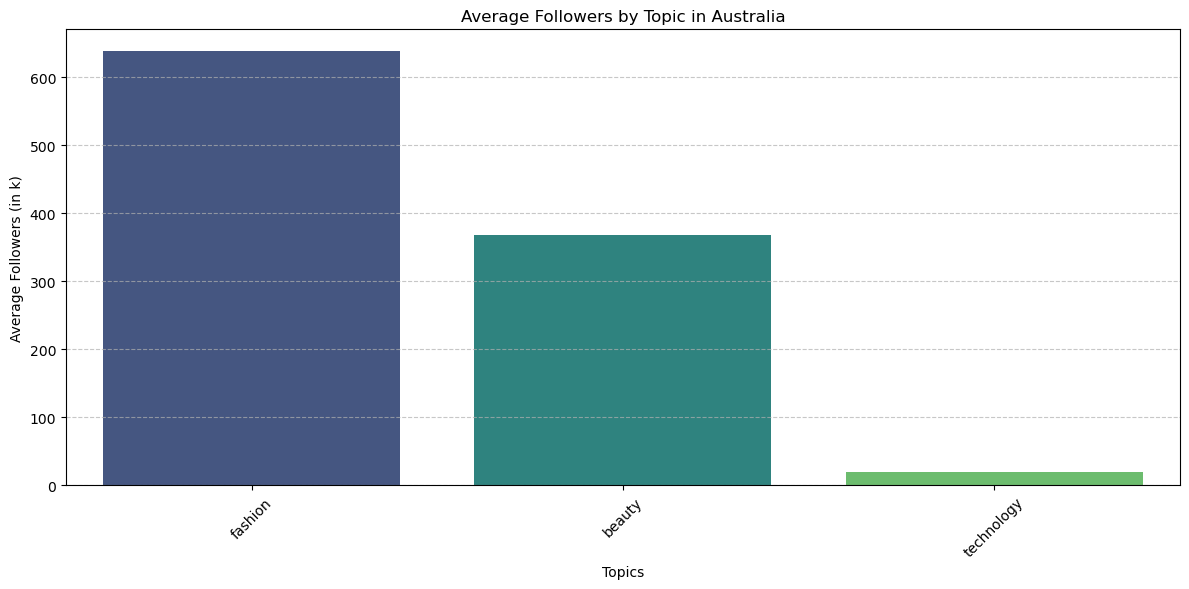

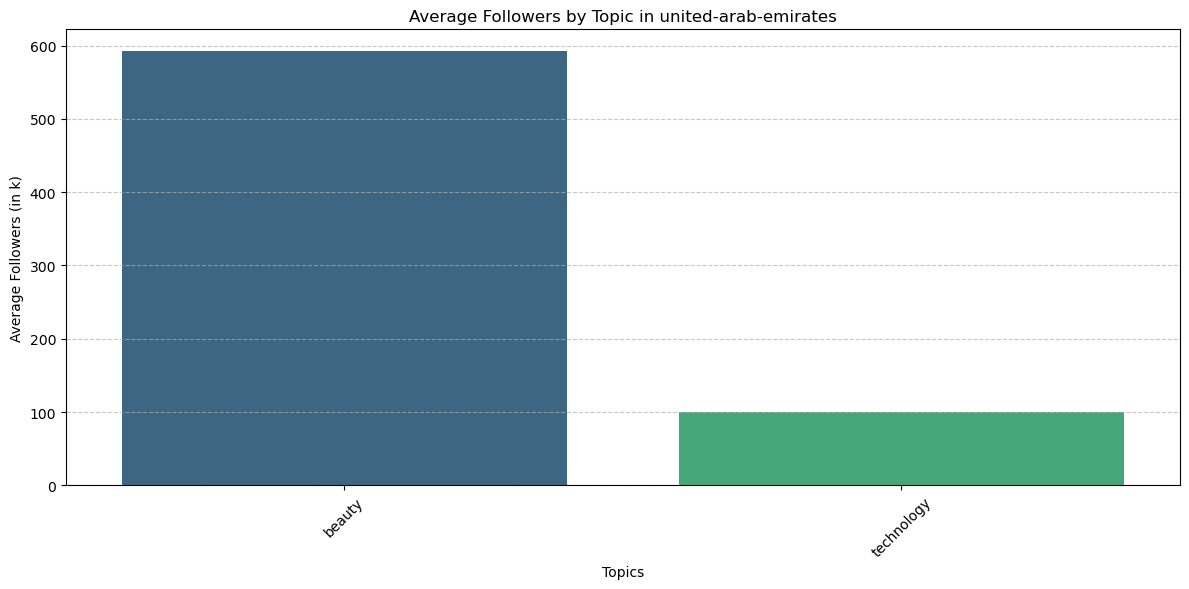

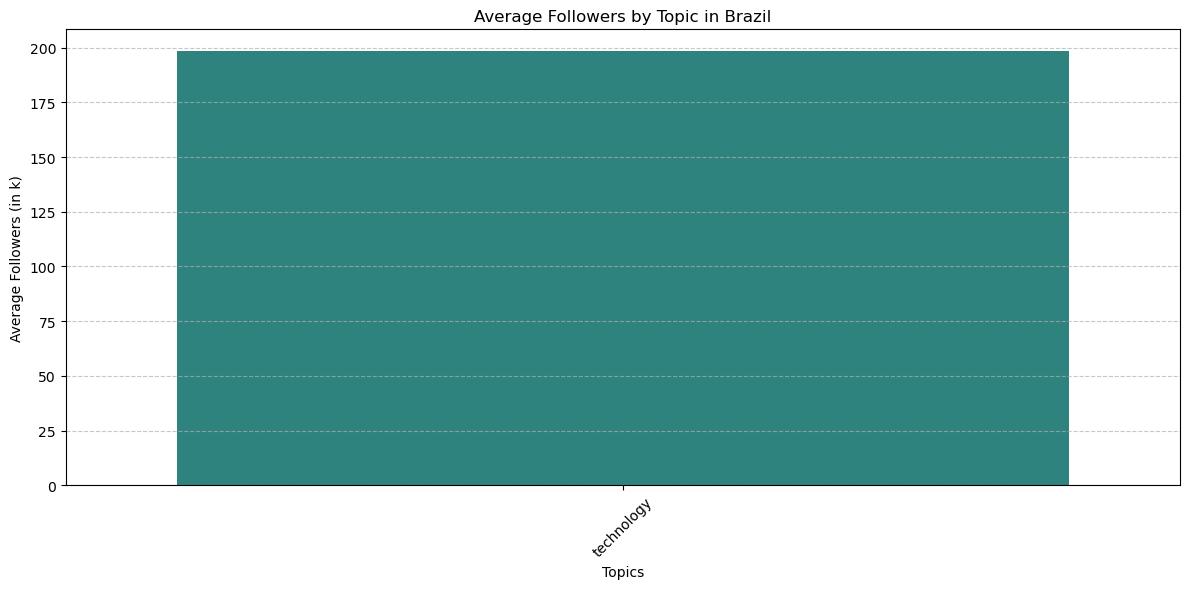

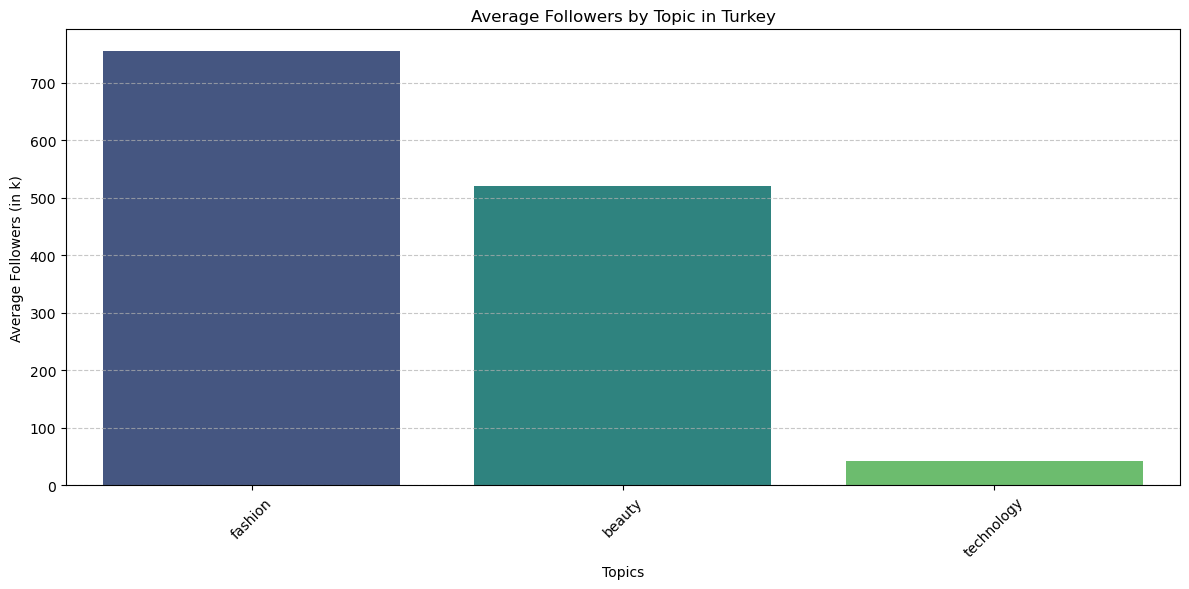

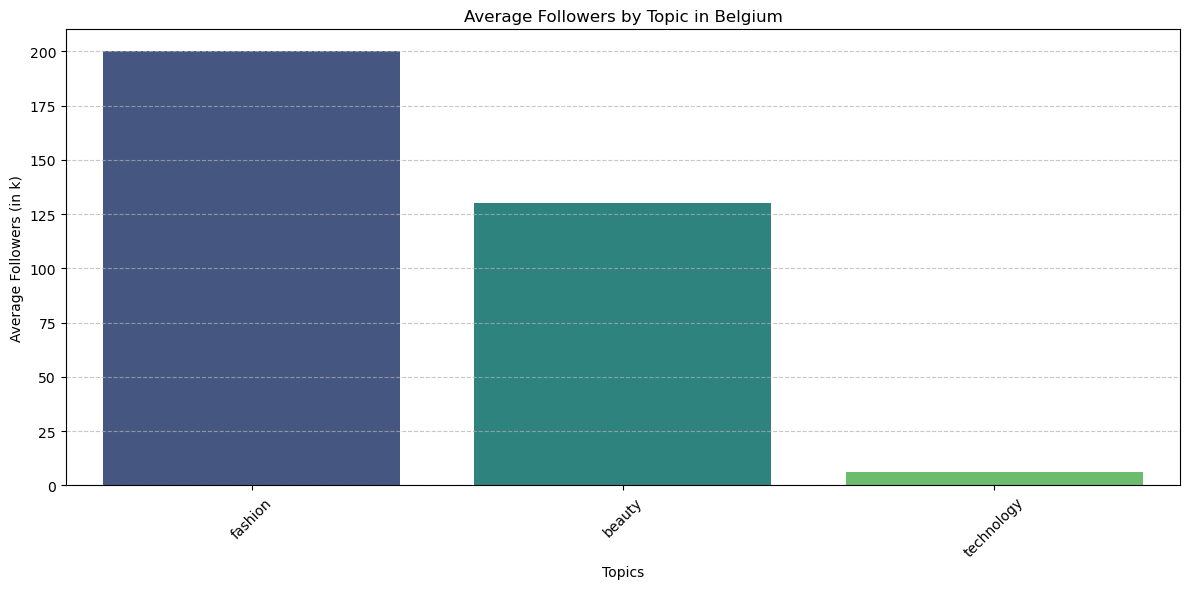

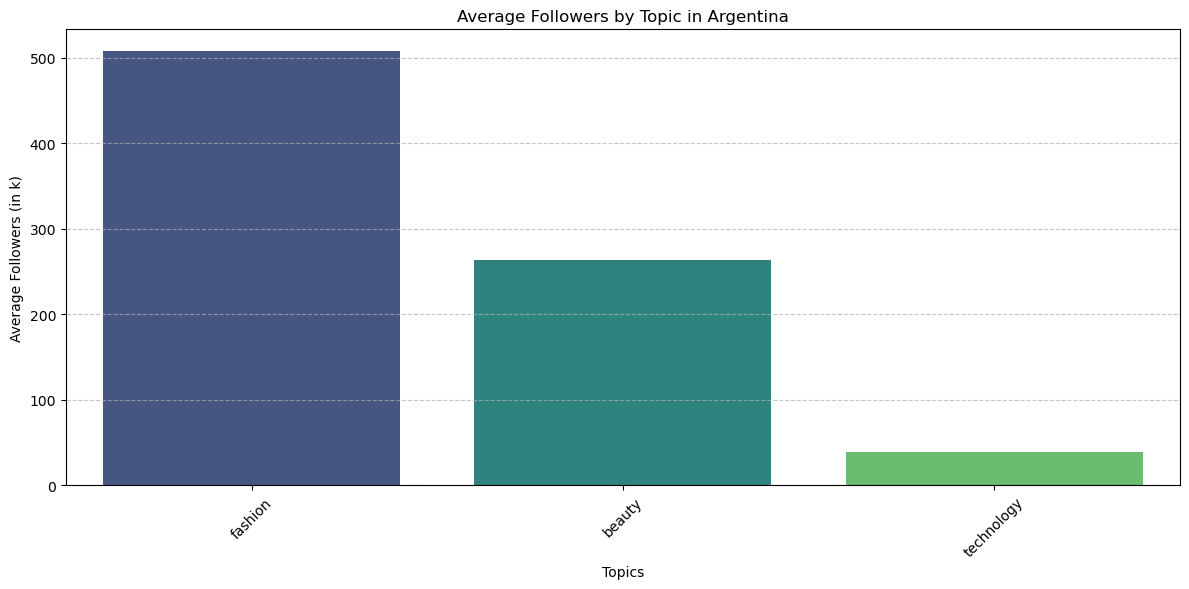

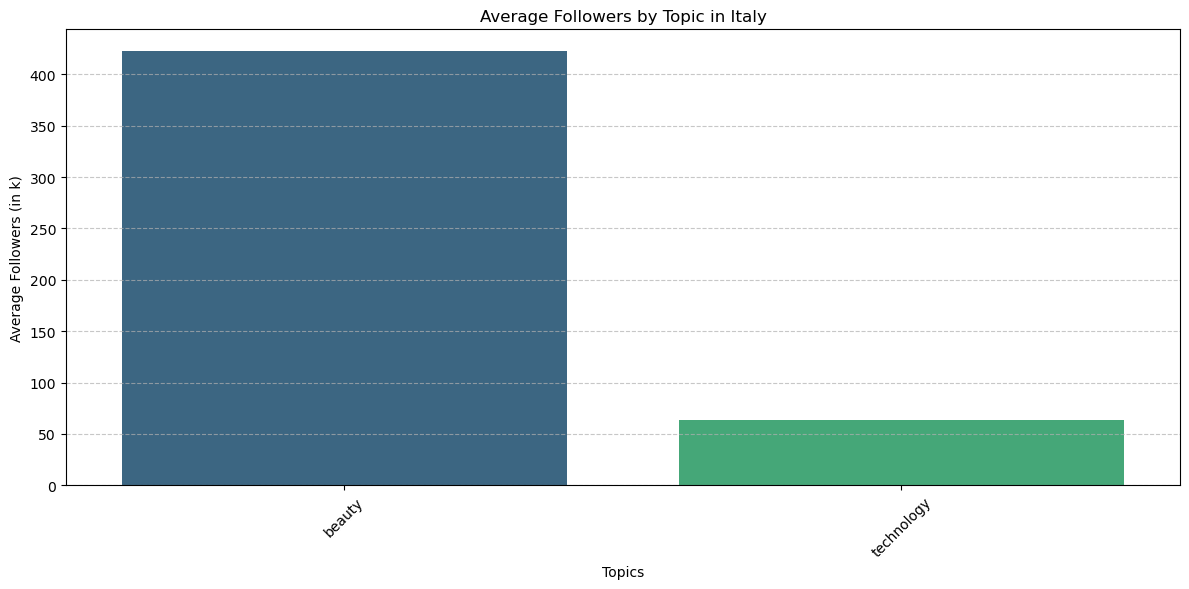

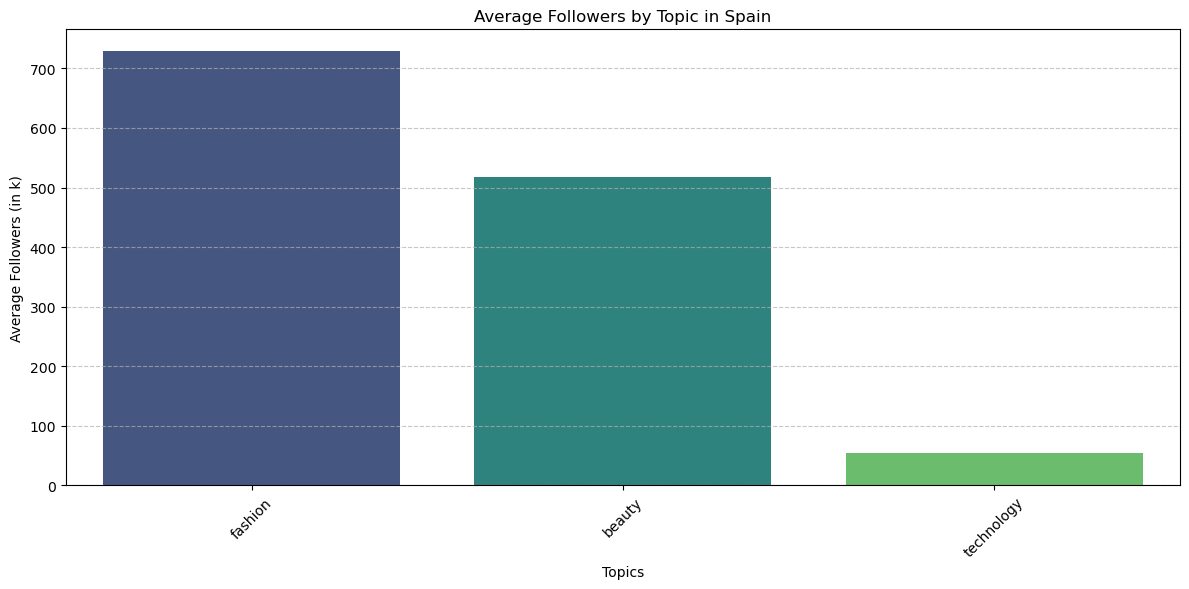

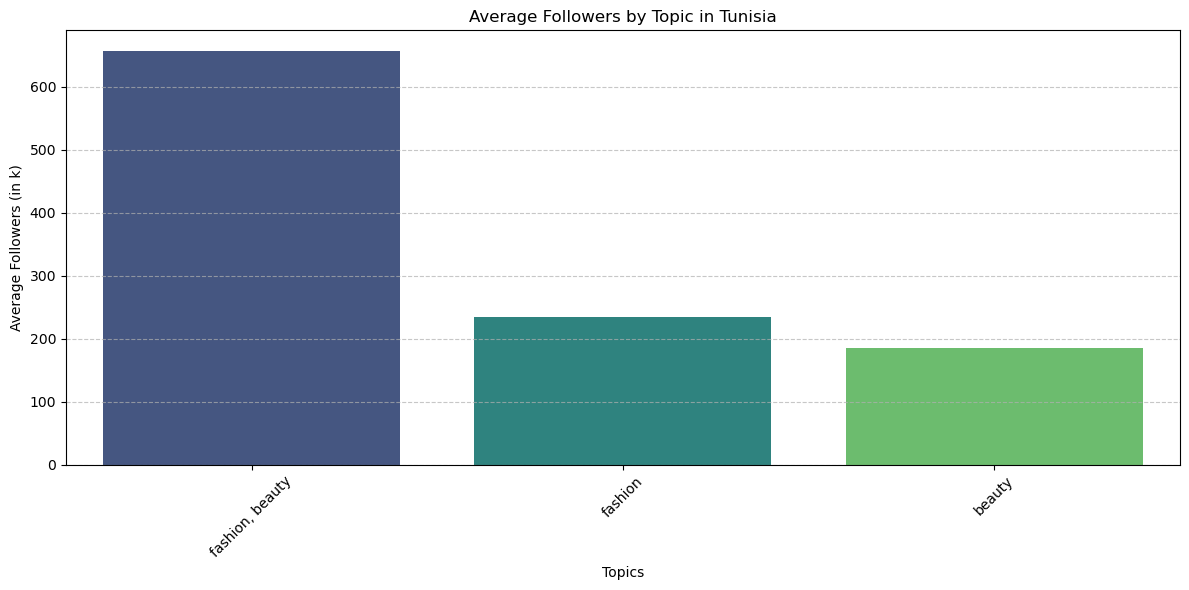

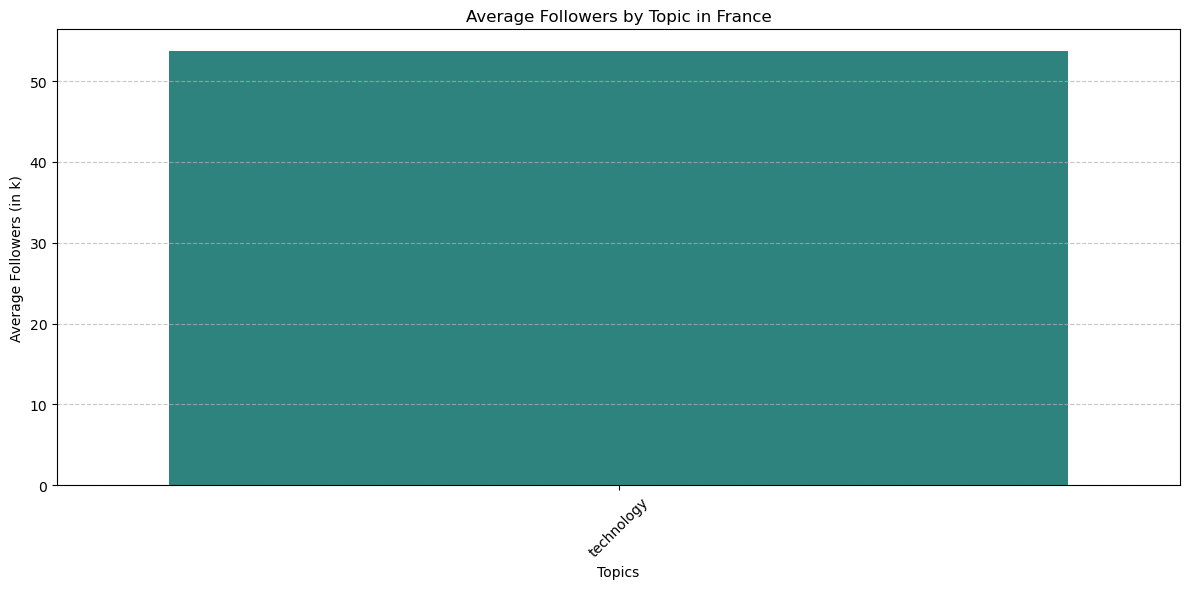

In [353]:
plot_avg_followers_by_topic_and_country(cleaned_df)